# Initial EDA and Cleaning

In this notebook, we are going to do an initial exploration of the data we have downloaded from Zillow and Inside Airbnb. We will perform basic cleaning of the data, dropping any unnecessary columns and dealing with missing data.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import plotly.express as px

# Import Zillow Data

In [2]:
# Load target data
home_prices = pd.read_csv('raw_data/zillow/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

home_prices.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,232527.0,...,1124579.0,1119261.0,1114733.0,1112570.0,1113554.0,1108906.0,1104331.0,1098915.0,1089614.0,1090168.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,208780.0,...,488778.0,489319.0,490664.0,492714.0,495483.0,498200.0,500780.0,503294.0,505577.0,508007.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,184917.0,...,913735.0,916274.0,916593.0,920113.0,931353.0,934916.0,934687.0,930893.0,934775.0,945772.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,199929.0,...,336901.0,337728.0,338452.0,339876.0,341435.0,343897.0,346910.0,351188.0,355336.0,360190.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,281068.0,...,629766.0,629807.0,630985.0,632529.0,635442.0,638288.0,641416.0,644506.0,647307.0,650905.0


## Narrow data to only include Greater Nashville

In [3]:
nashville_df = home_prices[((home_prices['City']=="Nashville")|(home_prices['City']=="Franklin")
                             |(home_prices['City']=="Brentwood")|(home_prices['City']=="Goodlettsville")
                             |(home_prices['City']=="La Vergne")|(home_prices['City']=="Ashland City")
                             |(home_prices['City']=="Greenbrier")|(home_prices['City']=="Pegram")
                             |(home_prices['City']=="Bradyville")) & (home_prices['State']=='TN')]
nashville_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109670.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,106734.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
330,74145,334,37064,Zip,TN,TN,Franklin,Nashville-Davidson--Murfreesboro--Franklin,Williamson County,185356.0,...,488596.0,491014.0,493454.0,497781.0,502102.0,506703.0,512290.0,518804.0,523996.0,528333.0
493,74113,497,37027,Zip,TN,TN,Brentwood,Nashville-Davidson--Murfreesboro--Franklin,Williamson County,278097.0,...,660580.0,664187.0,668981.0,676190.0,682782.0,688810.0,695955.0,704631.0,712062.0,718750.0
979,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147818.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109565.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,111805.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0
1349,74178,1362,37115,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,83431.0,...,221906.0,223547.0,225470.0,227345.0,229725.0,231768.0,233924.0,236437.0,238750.0,240945.0
1935,74238,1951,37207,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,88757.0,...,260175.0,262039.0,264413.0,267231.0,271242.0,275291.0,279386.0,283637.0,287225.0,290689.0
2201,74245,2218,37214,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,90986.0,...,256530.0,258352.0,260171.0,262305.0,264870.0,267812.0,270533.0,273683.0,276198.0,278854.0


# Import Airbnb Data

## Create list containing all listing files

In [4]:
listing_files = glob('raw_data/airbnb/listings/*.csv.gz')
listing_files

['raw_data/airbnb/listings\\listings_10_15.csv.gz',
 'raw_data/airbnb/listings\\listings_10_18.csv.gz',
 'raw_data/airbnb/listings\\listings_10_19.csv.gz',
 'raw_data/airbnb/listings\\listings_10_20.csv.gz',
 'raw_data/airbnb/listings\\listings_11_18.csv.gz',
 'raw_data/airbnb/listings\\listings_11_19.csv.gz',
 'raw_data/airbnb/listings\\listings_11_20.csv.gz',
 'raw_data/airbnb/listings\\listings_12_18.csv.gz',
 'raw_data/airbnb/listings\\listings_12_19.csv.gz',
 'raw_data/airbnb/listings\\listings_12_20.csv.gz',
 'raw_data/airbnb/listings\\listings_1_19.csv.gz',
 'raw_data/airbnb/listings\\listings_1_20.csv.gz',
 'raw_data/airbnb/listings\\listings_1_21.csv.gz',
 'raw_data/airbnb/listings\\listings_2_19.csv.gz',
 'raw_data/airbnb/listings\\listings_2_20.csv.gz',
 'raw_data/airbnb/listings\\listings_2_21.csv.gz',
 'raw_data/airbnb/listings\\listings_3_19.csv.gz',
 'raw_data/airbnb/listings\\listings_3_20.csv.gz',
 'raw_data/airbnb/listings\\listings_4_18.csv.gz',
 'raw_data/airbnb/lis

## Create a list of dataframes from the listings

In [5]:
dfs = []
for file in listing_files:
    df = pd.read_csv(file, index_col=0, header=0)
    dfs.append(df)

## Concatenate all the listing dataframes

In [6]:
airbnb_df = pd.concat(dfs, axis=0, ignore_index=False)

airbnb_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_text,number_of_reviews_l30d,last_searched,region_id,region_name,region_parent_id
id,,,,,,,,,,,,,,,,,,,,,
5795487,https://www.airbnb.com/rooms/5795487,20151002210713,2015-10-03,Luxurious Cozy Guesthouse Retreat,650 sq ft - completely private & separate from...,NaN,650 sq ft - completely private & separate from...,none,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8082102,https://www.airbnb.com/rooms/8082102,20151002210713,2015-10-03,Jetty's Renaissance Ranch,"Relax in this tranquil, rural, Ranch home Tuck...",Located on a private dead end road; establishe...,"Relax in this tranquil, rural, Ranch home Tuck...",none,"It is very tranquil, Yet a short drive to Nash...",Very quiet the perfect relaxing setting for th...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2480117,https://www.airbnb.com/rooms/2480117,20151002210713,2015-10-03,Roomy Teal Room,Our beautiful home features the Roomy Teal Roo...,Our space is clean and comfortable. Tracey is ...,Our beautiful home features the Roomy Teal Roo...,none,Tracy (phone number hidden) Live in house manager,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8291271,https://www.airbnb.com/rooms/8291271,20151002210713,2015-10-03,Private Suite (Apartment style),This is a mother-n-law private suite with full...,The space is over 1000+ sqft. It's a lovely q...,This is a mother-n-law private suite with full...,none,"This is a very established neighborhood, surro...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997187,https://www.airbnb.com/rooms/997187,20151002210713,2015-10-03,2 private rooms in Nashville,"House Rules. 1. No over night quests, or addit...",This is a brand new home and a beautiful place...,"House Rules. 1. No over night quests, or addit...",none,This community is wonderful. It is a very safe...,I do not allow any pets.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#can use last scraped as a proxy for date
airbnb_df.last_scraped.value_counts()

2020-02-22    7574
2020-01-14    7506
2019-11-20    7396
2019-10-18    7371
2019-08-14    7200
              ... 
2020-09-06       1
2019-10-11       1
2020-10-01       1
2019-07-15       1
2021-02-25       1
Name: last_scraped, Length: 77, dtype: int64

In [8]:
airbnb_df.reset_index(inplace=True)

In [9]:
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_text,number_of_reviews_l30d,last_searched,region_id,region_name,region_parent_id
0,5795487,https://www.airbnb.com/rooms/5795487,20151002210713,2015-10-03,Luxurious Cozy Guesthouse Retreat,650 sq ft - completely private & separate from...,NaN,650 sq ft - completely private & separate from...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8082102,https://www.airbnb.com/rooms/8082102,20151002210713,2015-10-03,Jetty's Renaissance Ranch,"Relax in this tranquil, rural, Ranch home Tuck...",Located on a private dead end road; establishe...,"Relax in this tranquil, rural, Ranch home Tuck...",none,"It is very tranquil, Yet a short drive to Nash...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2480117,https://www.airbnb.com/rooms/2480117,20151002210713,2015-10-03,Roomy Teal Room,Our beautiful home features the Roomy Teal Roo...,Our space is clean and comfortable. Tracey is ...,Our beautiful home features the Roomy Teal Roo...,none,Tracy (phone number hidden) Live in house manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8291271,https://www.airbnb.com/rooms/8291271,20151002210713,2015-10-03,Private Suite (Apartment style),This is a mother-n-law private suite with full...,The space is over 1000+ sqft. It's a lovely q...,This is a mother-n-law private suite with full...,none,"This is a very established neighborhood, surro...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,997187,https://www.airbnb.com/rooms/997187,20151002210713,2015-10-03,2 private rooms in Nashville,"House Rules. 1. No over night quests, or addit...",This is a brand new home and a beautiful place...,"House Rules. 1. No over night quests, or addit...",none,This community is wonderful. It is a very safe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
airbnb_df.id.value_counts()

1376970     38
6446261     38
3686152     38
1006989     38
1954040     38
            ..
8335985      1
14573396     1
45766485     1
18872161     1
33527757     1
Name: id, Length: 19451, dtype: int64

## Import most recent calendar data

In [11]:
# reviews_df = pd.read_csv('raw_data/airbnb/reviews_2_21.csv.gz', compression='gzip')
# reviews_df.head()

In [12]:
calendar_df = pd.read_csv('raw_data/airbnb/calendar_2_21.csv.gz', compression='gzip')
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2021-02-20,f,$40.00,$40.00,30.0,365.0
1,6422,2021-02-21,f,$40.00,$40.00,30.0,365.0
2,6422,2021-02-22,f,$40.00,$40.00,30.0,365.0
3,6422,2021-02-23,f,$40.00,$40.00,30.0,365.0
4,6422,2021-02-24,f,$40.00,$40.00,30.0,365.0


In [13]:
calendar_df['date'].value_counts()

2021-09-02    6144
2021-10-08    6144
2021-09-17    6144
2021-04-30    6144
2021-12-29    6144
              ... 
2022-02-20     669
2022-02-21       1
2022-02-24       1
2022-02-22       1
2022-02-23       1
Name: date, Length: 371, dtype: int64

In [14]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

In [15]:
calendar_df.set_index('date', inplace=True)

In [16]:
# change to binary values so can be summed to determine availability
binary_dict = {'f':0, 't':1}
calendar_df['available'] = calendar_df['available'].map(binary_dict)

In [17]:
# only include 2021--not all homes may have availability listed beyond that
calendar_2021_df = calendar_df['2021']

In [18]:
calendar_2021_df

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
date,,,,,,
2021-02-20,6422,0,$40.00,$40.00,30.0,365.0
2021-02-21,6422,0,$40.00,$40.00,30.0,365.0
2021-02-22,6422,0,$40.00,$40.00,30.0,365.0
2021-02-23,6422,0,$40.00,$40.00,30.0,365.0
2021-02-24,6422,0,$40.00,$40.00,30.0,365.0
...,...,...,...,...,...,...
2021-12-27,48107192,1,$32.00,$32.00,90.0,365.0
2021-12-28,48107192,1,$32.00,$32.00,90.0,365.0
2021-12-29,48107192,1,$32.00,$32.00,90.0,365.0


In [19]:
# create dataframe with 2021 available days of current listings
availability_21_df = calendar_2021_df.groupby(['listing_id']).sum()

In [20]:
availability_21_df

,available,minimum_nights,maximum_nights
listing_id,,,
6422,217,9450.0,114975.0
25613,21,630.0,354375.0
136015,140,9450.0,354375.0
258817,314,9450.0,114975.0
289242,314,9450.0,114975.0
...,...,...,...
48207668,247,28350.0,114975.0
48208643,233,9420.0,114610.0
48211893,95,9450.0,28350.0


In [21]:
# save new dataframe
availability_21_df.to_csv('cleaned_data/availability_data.csv')

We now will be able to add an availability feature to our dataframe of current airbnb listings.

# Clean Zillow Data

In [22]:
nashville_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109670.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,106734.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
330,74145,334,37064,Zip,TN,TN,Franklin,Nashville-Davidson--Murfreesboro--Franklin,Williamson County,185356.0,...,488596.0,491014.0,493454.0,497781.0,502102.0,506703.0,512290.0,518804.0,523996.0,528333.0
493,74113,497,37027,Zip,TN,TN,Brentwood,Nashville-Davidson--Murfreesboro--Franklin,Williamson County,278097.0,...,660580.0,664187.0,668981.0,676190.0,682782.0,688810.0,695955.0,704631.0,712062.0,718750.0
979,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147818.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0


## Drop Unnecessary Columns

In [23]:
# only interested in zipcode and price for each date
nashville_prices_df = nashville_df.drop(columns=['RegionID', 'SizeRank', 'RegionType', 
                                                 'StateName', 'State', 'City', 'Metro', 'CountyName'])

In [24]:
nashville_prices_df.head()

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,37013,109670.0,110113.0,110502.0,111295.0,112128.0,112982.0,113867.0,114736.0,115551.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,37211,106734.0,107099.0,107465.0,108224.0,108963.0,109639.0,110367.0,111082.0,111876.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
330,37064,185356.0,185830.0,186363.0,187234.0,188162.0,189085.0,190103.0,190882.0,191703.0,...,488596.0,491014.0,493454.0,497781.0,502102.0,506703.0,512290.0,518804.0,523996.0,528333.0
493,37027,278097.0,278949.0,280102.0,282052.0,283765.0,285161.0,286776.0,288433.0,289973.0,...,660580.0,664187.0,668981.0,676190.0,682782.0,688810.0,695955.0,704631.0,712062.0,718750.0
979,37221,147818.0,148278.0,148776.0,149757.0,150615.0,151485.0,152349.0,153349.0,154261.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0


## Set up dataframe with date as the index and zipcodes as the columns

In [25]:
# set region name as index so it becomes the columns after transposing
nashville_prices_df.set_index('RegionName', inplace=True)
nashville_prices_df.head()

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
RegionName,,,,,,,,,,,,,,,,,,,,,
37013,109670.0,110113.0,110502.0,111295.0,112128.0,112982.0,113867.0,114736.0,115551.0,116199.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
37211,106734.0,107099.0,107465.0,108224.0,108963.0,109639.0,110367.0,111082.0,111876.0,112514.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
37064,185356.0,185830.0,186363.0,187234.0,188162.0,189085.0,190103.0,190882.0,191703.0,192556.0,...,488596.0,491014.0,493454.0,497781.0,502102.0,506703.0,512290.0,518804.0,523996.0,528333.0
37027,278097.0,278949.0,280102.0,282052.0,283765.0,285161.0,286776.0,288433.0,289973.0,291356.0,...,660580.0,664187.0,668981.0,676190.0,682782.0,688810.0,695955.0,704631.0,712062.0,718750.0
37221,147818.0,148278.0,148776.0,149757.0,150615.0,151485.0,152349.0,153349.0,154261.0,155079.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0


In [26]:
# transpose date and zipcode
nashville_prices_df = nashville_prices_df.transpose()
nashville_prices_df.head()

RegionName,37013,37211,37064,37027,37221,37209,37076,37115,37207,37214,...,37069,37073,37218,37080,37220,37219,37143,37189,37201,37026
1996-01-31,109670.0,106734.0,185356.0,278097.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,...,224206.0,97999.0,96715.0,100882.0,185197.0,NaN,102606.0,99095.0,NaN,NaN
1996-02-29,110113.0,107099.0,185830.0,278949.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,...,224165.0,98271.0,96743.0,100959.0,185138.0,NaN,102595.0,99161.0,NaN,NaN
1996-03-31,110502.0,107465.0,186363.0,280102.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,...,224813.0,98600.0,96824.0,101073.0,185521.0,NaN,102631.0,99564.0,NaN,NaN
1996-04-30,111295.0,108224.0,187234.0,282052.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,...,225632.0,99234.0,97066.0,101279.0,186392.0,NaN,102838.0,99833.0,NaN,NaN
1996-05-31,112128.0,108963.0,188162.0,283765.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,...,227047.0,99774.0,97800.0,101650.0,187482.0,NaN,103283.0,100366.0,NaN,NaN


In [27]:
# reset index so we can convert dates to datetime datatype
nashville_prices_df.reset_index(inplace=True)
nashville_prices_df.head()

RegionName,index,37013,37211,37064,37027,37221,37209,37076,37115,37207,...,37069,37073,37218,37080,37220,37219,37143,37189,37201,37026
0,1996-01-31,109670.0,106734.0,185356.0,278097.0,147818.0,109565.0,111805.0,83431.0,88757.0,...,224206.0,97999.0,96715.0,100882.0,185197.0,NaN,102606.0,99095.0,NaN,NaN
1,1996-02-29,110113.0,107099.0,185830.0,278949.0,148278.0,109833.0,112174.0,83844.0,88978.0,...,224165.0,98271.0,96743.0,100959.0,185138.0,NaN,102595.0,99161.0,NaN,NaN
2,1996-03-31,110502.0,107465.0,186363.0,280102.0,148776.0,110119.0,112465.0,84214.0,89205.0,...,224813.0,98600.0,96824.0,101073.0,185521.0,NaN,102631.0,99564.0,NaN,NaN
3,1996-04-30,111295.0,108224.0,187234.0,282052.0,149757.0,110736.0,113059.0,84939.0,89562.0,...,225632.0,99234.0,97066.0,101279.0,186392.0,NaN,102838.0,99833.0,NaN,NaN
4,1996-05-31,112128.0,108963.0,188162.0,283765.0,150615.0,111338.0,113683.0,85603.0,90104.0,...,227047.0,99774.0,97800.0,101650.0,187482.0,NaN,103283.0,100366.0,NaN,NaN


In [28]:
# convert dates to datetime datatype
nashville_prices_df['index'] = pd.to_datetime(nashville_prices_df['index'])

In [29]:
# set date as the index
nashville_prices_df.set_index('index', inplace=True)
nashville_prices_df

RegionName,37013,37211,37064,37027,37221,37209,37076,37115,37207,37214,...,37069,37073,37218,37080,37220,37219,37143,37189,37201,37026
index,,,,,,,,,,,,,,,,,,,,,
1996-01-31,109670.0,106734.0,185356.0,278097.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,...,224206.0,97999.0,96715.0,100882.0,185197.0,NaN,102606.0,99095.0,NaN,NaN
1996-02-29,110113.0,107099.0,185830.0,278949.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,...,224165.0,98271.0,96743.0,100959.0,185138.0,NaN,102595.0,99161.0,NaN,NaN
1996-03-31,110502.0,107465.0,186363.0,280102.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,...,224813.0,98600.0,96824.0,101073.0,185521.0,NaN,102631.0,99564.0,NaN,NaN
1996-04-30,111295.0,108224.0,187234.0,282052.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,...,225632.0,99234.0,97066.0,101279.0,186392.0,NaN,102838.0,99833.0,NaN,NaN
1996-05-31,112128.0,108963.0,188162.0,283765.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,...,227047.0,99774.0,97800.0,101650.0,187482.0,NaN,103283.0,100366.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,259031.0,293072.0,506703.0,688810.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,...,570103.0,258717.0,241525.0,244317.0,561117.0,430796.0,285525.0,266038.0,383293.0,167794.0
2020-11-30,261394.0,295822.0,512290.0,695955.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,...,576473.0,261733.0,242735.0,246970.0,566165.0,430763.0,289212.0,268952.0,383351.0,168378.0
2020-12-31,264071.0,299249.0,518804.0,704631.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,...,583941.0,265054.0,244148.0,249040.0,572388.0,432595.0,293302.0,271794.0,383955.0,169000.0


## Further explore cleaned zillow dataframe

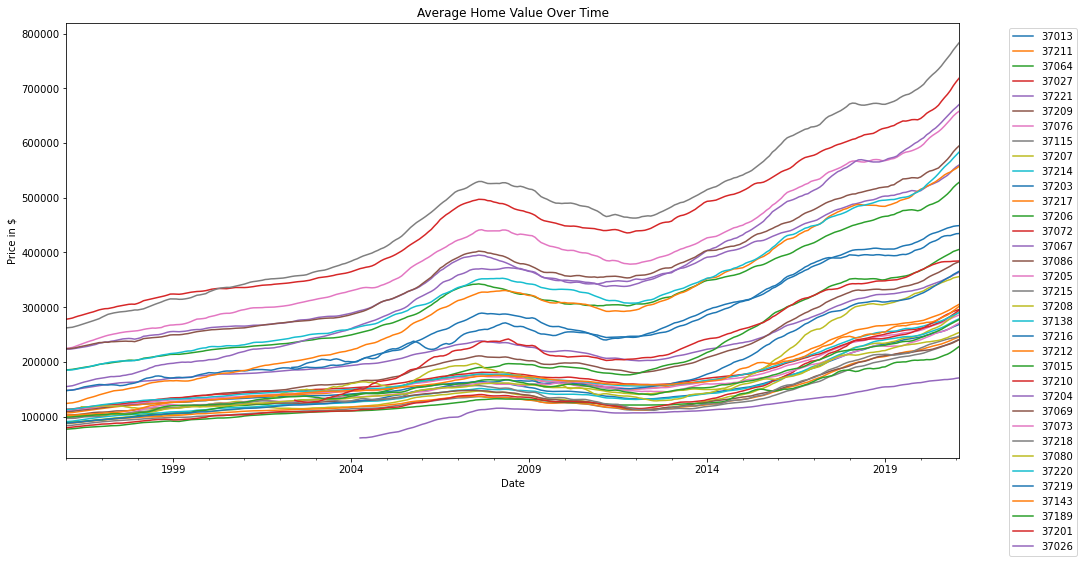

In [31]:
# nashville_prices_df.plot(figsize = (16,8), subplots=False, legend=True)
# plt.title('Average Home Value Over Time')
# plt.xlabel('Date')
# plt.ylabel('Price in $')
# plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left');

In [36]:

df = nashville_prices_df.reset_index()
fig = px.line(df, x='index', y=df.columns, title='Average Home Value Over Time')
fig.show()

Nearly all of the zipcodes in Nashville have experienced explosive growth, especially in the last 10 years.

In [38]:
# view column names and datatypes
nashville_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 1996-01-31 to 2021-02-28
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   37013   302 non-null    float64
 1   37211   302 non-null    float64
 2   37064   302 non-null    float64
 3   37027   302 non-null    float64
 4   37221   302 non-null    float64
 5   37209   302 non-null    float64
 6   37076   302 non-null    float64
 7   37115   302 non-null    float64
 8   37207   302 non-null    float64
 9   37214   302 non-null    float64
 10  37203   302 non-null    float64
 11  37217   302 non-null    float64
 12  37206   302 non-null    float64
 13  37072   302 non-null    float64
 14  37067   302 non-null    float64
 15  37086   302 non-null    float64
 16  37205   302 non-null    float64
 17  37215   302 non-null    float64
 18  37208   297 non-null    float64
 19  37138   302 non-null    float64
 20  37216   302 non-null    float64
 21  37212   302 non-null

In [39]:
# view missing values
nashville_prices_df.isna().sum()

RegionName
37013     0
37211     0
37064     0
37027     0
37221     0
37209     0
37076     0
37115     0
37207     0
37214     0
37203     0
37217     0
37206     0
37072     0
37067     0
37086     0
37205     0
37215     0
37208     5
37138     0
37216     0
37212     0
37015     0
37210     0
37204     0
37069     0
37073     0
37218     0
37080     0
37220     0
37219    76
37143     0
37189     0
37201    77
37026    99
dtype: int64

There are some missing values appearing at the beginning of the dataset, but since we only have airbnb data going back to 2015, these missing values will likely be dropped after merging with the Airbnb data.

In [40]:
# save cleaned airbnb dataframe
nashville_prices_df.to_csv("cleaned_data/zillow_data_clean.csv")

# Clean Airbnb Data

In [37]:
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms_text,number_of_reviews_l30d,last_searched,region_id,region_name,region_parent_id
0,5795487,https://www.airbnb.com/rooms/5795487,20151002210713,2015-10-03,Luxurious Cozy Guesthouse Retreat,650 sq ft - completely private & separate from...,NaN,650 sq ft - completely private & separate from...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8082102,https://www.airbnb.com/rooms/8082102,20151002210713,2015-10-03,Jetty's Renaissance Ranch,"Relax in this tranquil, rural, Ranch home Tuck...",Located on a private dead end road; establishe...,"Relax in this tranquil, rural, Ranch home Tuck...",none,"It is very tranquil, Yet a short drive to Nash...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2480117,https://www.airbnb.com/rooms/2480117,20151002210713,2015-10-03,Roomy Teal Room,Our beautiful home features the Roomy Teal Roo...,Our space is clean and comfortable. Tracey is ...,Our beautiful home features the Roomy Teal Roo...,none,Tracy (phone number hidden) Live in house manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8291271,https://www.airbnb.com/rooms/8291271,20151002210713,2015-10-03,Private Suite (Apartment style),This is a mother-n-law private suite with full...,The space is over 1000+ sqft. It's a lovely q...,This is a mother-n-law private suite with full...,none,"This is a very established neighborhood, surro...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,997187,https://www.airbnb.com/rooms/997187,20151002210713,2015-10-03,2 private rooms in Nashville,"House Rules. 1. No over night quests, or addit...",This is a brand new home and a beautiful place...,"House Rules. 1. No over night quests, or addit...",none,This community is wonderful. It is a very safe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Explore columns and column values

In [41]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233411 entries, 0 to 233410
Columns: 112 entries, id to region_parent_id
dtypes: float64(34), int64(9), object(69)
memory usage: 199.4+ MB


In [42]:
# print all 112 column names
for col_name in airbnb_df.columns:
    print(col_name)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_re

In [43]:
# print top 5 values for each column
for col in airbnb_df.columns:
    print(col)
    print(airbnb_df[col].value_counts(dropna=False).head())
    print('\n')

id
1376970    38
6446261    38
3686152    38
1006989    38
1954040    38
Name: id, dtype: int64


listing_url
https://www.airbnb.com/rooms/5796020    38
https://www.airbnb.com/rooms/2666769    38
https://www.airbnb.com/rooms/1469884    38
https://www.airbnb.com/rooms/25613      38
https://www.airbnb.com/rooms/3158038    38
Name: listing_url, dtype: int64


scrape_id
20200317212909    7578
20200222045830    7574
20200114005522    7506
20191215213810    7496
20200421142847    7436
Name: scrape_id, dtype: int64


last_scraped
2020-02-22    7574
2020-01-14    7506
2019-11-20    7396
2019-10-18    7371
2019-08-14    7200
Name: last_scraped, dtype: int64


name
Wyndham Nashville - 2 Bedroom Condo                 192
East Nashville Bungalow                             132
Live + Work + Stay + Easy  | 1BR in Nashville       109
Margaritaville, New Studio near Broadway and HOF    100
Cozy East Nashville Home                             96
Name: name, dtype: int64


summary
NaN                  

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  95140
Arriving by car: Never fear! Your building has on-site, valet parking to the garage below.  Arriving without a car? No problem!  Exploring by foot: Your condo’s convenient D

Name: host_is_superhost, dtype: int64


host_thumbnail_url
https://a0.muscache.com/im/pictures/user/e96227e0-8f49-4ef4-8f22-5ae782ec06c3.jpg?aki_policy=profile_small    5125
https://a0.muscache.com/im/pictures/user/4587b5c1-3fbe-4ccb-bf50-62ae279162a7.jpg?aki_policy=profile_small    4933
https://a0.muscache.com/im/pictures/user/ec598420-f3f0-4c5d-9618-d1b6125d8c43.jpg?aki_policy=profile_small    2969
https://a0.muscache.com/im/pictures/1c4575aa-5d97-46ce-9799-c8e9deadff86.jpg?aki_policy=profile_small         2705
https://a0.muscache.com/im/pictures/user/9bc8d798-a8d6-485f-966d-6e5e3f3c64d5.jpg?aki_policy=profile_small    2115
Name: host_thumbnail_url, dtype: int64


host_picture_url
https://a0.muscache.com/im/pictures/user/e96227e0-8f49-4ef4-8f22-5ae782ec06c3.jpg?aki_policy=profile_x_medium    5125
https://a0.muscache.com/im/pictures/user/4587b5c1-3fbe-4ccb-bf50-62ae279162a7.jpg?aki_policy=profile_x_medium    4933
https://a0.muscache.com/im/pictures/user/ec598420-f3f0-4c5d-9618-d1b6125

Name: minimum_nights, dtype: int64


maximum_nights
1125.0    123122
365.0      18588
30.0       17698
14.0        8411
7.0         6968
Name: maximum_nights, dtype: int64


calendar_updated
today          70158
NaN            42639
2 weeks ago    12686
a week ago     11828
yesterday      11027
Name: calendar_updated, dtype: int64


has_availability
t      230007
NaN      3277
f         127
Name: has_availability, dtype: int64


availability_30
0     46932
30    14491
16     7536
15     7409
14     7307
Name: availability_30, dtype: int64


availability_60
0     37555
60    10464
59     4514
40     4276
39     4233
Name: availability_60, dtype: int64


availability_90
0     32783
90     8902
89     4348
74     3435
83     3395
Name: availability_90, dtype: int64


availability_365
0      26002
365     4033
364     2197
1       1471
345     1341
Name: availability_365, dtype: int64


calendar_last_scraped
2020-02-22    7574
2020-01-14    7506
2019-11-20    7396
2019-10-18    7371
2019-0

NaN         231675
Davidson      1735
Cheatham         1
Name: region_name, dtype: int64


region_parent_id
NaN     231675
47.0      1736
Name: region_parent_id, dtype: int64




## Create new dataframe of columns to be used

In [44]:
# create df of most important columns for modeling
clean_airbnb_df = airbnb_df[['last_scraped', 'id','host_id','host_is_superhost','neighbourhood_cleansed',
                             'zipcode','latitude','longitude','property_type','room_type','accommodates',
                             'bathrooms','bedrooms','beds','price','guests_included','minimum_nights',
                             'maximum_nights','availability_30','availability_60','availability_90',
                             'number_of_reviews','review_scores_rating','review_scores_accuracy',
                             'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                             'review_scores_location','review_scores_value','instant_bookable',
                             'calculated_host_listings_count','reviews_per_month','number_of_reviews_ltm',
                             'bathrooms_text']].copy()

In [45]:
clean_airbnb_df.head()

,last_scraped,id,host_id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,number_of_reviews_ltm,bathrooms_text
0,2015-10-03,5795487,30066816,f,District 1,37080,36.274038,-86.910077,House,Entire home/apt,...,10.0,10.0,10.0,10.0,10.0,f,1.0,3.52,NaN,NaN
1,2015-10-03,8082102,55304,f,District 1,37189,36.259632,-86.870691,House,Private room,...,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN,NaN,NaN
2,2015-10-03,2480117,3155867,f,District 1,37218,36.217547,-86.843971,House,Private room,...,8.0,9.0,9.0,8.0,9.0,t,2.0,3.34,NaN,NaN
3,2015-10-03,8291271,1356379,f,District 1,37218,36.212933,-86.853004,House,Private room,...,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN,NaN,NaN
4,2015-10-03,997187,5479170,f,District 1,37218,36.221009,-86.873935,House,Private room,...,10.0,10.0,10.0,10.0,10.0,f,1.0,0.15,NaN,NaN


In [46]:
# inspect new df - now 34 columns
clean_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233411 entries, 0 to 233410
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   last_scraped                    233411 non-null  object 
 1   id                              233411 non-null  int64  
 2   host_id                         233411 non-null  int64  
 3   host_is_superhost               233224 non-null  object 
 4   neighbourhood_cleansed          233411 non-null  object 
 5   zipcode                         189855 non-null  object 
 6   latitude                        233411 non-null  float64
 7   longitude                       233411 non-null  float64
 8   property_type                   233410 non-null  object 
 9   room_type                       233411 non-null  object 
 10  accommodates                    233411 non-null  int64  
 11  bathrooms                       190749 non-null  float64
 12  bedrooms        

## Change price column datatype

In [47]:
def convert_dol_to_float(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [48]:
clean_airbnb_df = convert_dol_to_float(clean_airbnb_df, 'price')

In [49]:
# confirm datatype changed
clean_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233411 entries, 0 to 233410
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   last_scraped                    233411 non-null  object 
 1   id                              233411 non-null  int64  
 2   host_id                         233411 non-null  int64  
 3   host_is_superhost               233224 non-null  object 
 4   neighbourhood_cleansed          233411 non-null  object 
 5   zipcode                         189855 non-null  object 
 6   latitude                        233411 non-null  float64
 7   longitude                       233411 non-null  float64
 8   property_type                   233410 non-null  object 
 9   room_type                       233411 non-null  object 
 10  accommodates                    233411 non-null  int64  
 11  bathrooms                       190749 non-null  float64
 12  bedrooms        

## Handle missing zipcode values - to be used for location

### Explore zipcode and neighbourhood values

In [53]:
print(f'There are {clean_airbnb_df.zipcode.nunique()} unique zipcode values.')
print(f'There are {clean_airbnb_df.neighbourhood_cleansed.nunique()} unique neighborhood values.')

There are 86 unique zipcode values.
There are 35 unique neighborhood values.


In [54]:
clean_airbnb_df['zipcode'].value_counts(dropna=False)

NaN             43556
37203           28656
37206           24376
37212           14365
37219           12586
                ...  
37029.0             2
37026               1
37206\n37206        1
37143.0             1
37240               1
Name: zipcode, Length: 87, dtype: int64

There are over 43,000 missing zipcode values. It will be important for us to have zipcodes for each entry if we want to perform any location specific analyses, since our zillow data is all based on zipcodes.

### Use neighbourhood values as a proxy to fill missing zipcodes

In [55]:
# convert missing zipcode values to 0 so datatypes can be changed
clean_airbnb_df['zipcode'] = clean_airbnb_df['zipcode'].fillna(0)

In [56]:
# convert to string so only first 5 numbers can be sliced
clean_airbnb_df['zipcode'] = clean_airbnb_df['zipcode'].astype(str)

clean_airbnb_df['zipcode'] = clean_airbnb_df['zipcode'].apply(lambda x: x[0:5])

In [57]:
# check if any remaining values cannot be converted to float
clean_airbnb_df['zipcode'].value_counts(dropna=False)

0         43556
37203     28800
37206     24757
37212     14540
37219     12614
37208     12590
37209     12156
37216     11487
37207     11093
37214      8741
37204      8541
37210      8479
37211      7623
37201      6310
37205      3182
37217      2567
37215      2297
37013      2294
37076      2166
37115      1969
37221      1691
37218      1493
37072      1071
37138       840
37220       558
37228       458
37080       423
37027       406
37189       312
37143        89
\n           82
37213        41
37015        36
37073        21
37064        15
TN 37        13
37232        13
46617        10
37135         9
37029         8
37243         7
37020         7
32317         6
16823         6
28774         6
48108         6
77807         6
3720          5
37122         3
37086         2
46616         2
37222         2
37240         1
37026         1
Name: zipcode, dtype: int64

In [58]:
# convert incorrect zipcode inputs to zero so they can be handled with neighbourhood map
clean_airbnb_df['zipcode'] = clean_airbnb_df['zipcode'].replace(['\n    ','TN 37','3720'],0)

# confirm replaced worked
clean_airbnb_df['zipcode'].value_counts(dropna=False)

0        43556
37203    28800
37206    24757
37212    14540
37219    12614
37208    12590
37209    12156
37216    11487
37207    11093
37214     8741
37204     8541
37210     8479
37211     7623
37201     6310
37205     3182
37217     2567
37215     2297
37013     2294
37076     2166
37115     1969
37221     1691
37218     1493
37072     1071
37138      840
37220      558
37228      458
37080      423
37027      406
37189      312
0          100
37143       89
37213       41
37015       36
37073       21
37064       15
37232       13
46617       10
37135        9
37029        8
37243        7
37020        7
16823        6
28774        6
32317        6
77807        6
48108        6
37122        3
37086        2
37222        2
46616        2
37240        1
37026        1
Name: zipcode, dtype: int64

In [59]:
# confirmed zipcode values can be converted to numbers
clean_airbnb_df['zipcode'] = clean_airbnb_df['zipcode'].astype(int)

#### Create mapping of neighbourhoods to zipcode

In [60]:
# create list of unique neighbourhoods
districts = list(clean_airbnb_df['neighbourhood_cleansed'].unique())

In [61]:
# assign a zipcode to each unique neighbourhood based on the mode zipcode value of that neighbourhood
codes = []
for district in districts:
    code = clean_airbnb_df[clean_airbnb_df['neighbourhood_cleansed']==district]['zipcode'].mode()[0]
    codes.append(code)

In [62]:
# create dictionary of districts and their most frequent zipcodes
district_zip_dict = {districts[i]: codes[i] for i in range(len(districts))}

district_zip_dict

{'District 1': 37218,
 'District 6': 37206,
 'District 19': 37203,
 'District 13': 37214,
 'District 29': 37217,
 'District 21': 37203,
 'District 2': 37207,
 'District 8': 37216,
 'District 31': 37013,
 'District 32': 37013,
 'District 22': 37221,
 'District 23': 37205,
 'District 33': 37013,
 'District 34': 37215,
 'District 35': 37221,
 'District 9': 37115,
 'District 4': 37211,
 'District 14': 37214,
 'District 15': 37214,
 'District 16': 37211,
 'District 24': 37209,
 'District 25': 37215,
 'District 26': 37211,
 'District 27': 37211,
 'District 28': 37013,
 'District 5': 37207,
 'District 7': 37216,
 'District 3': 37207,
 'District 10': 37072,
 'District 17': 37203,
 'District 18': 37212,
 'District 20': 37209,
 'District 12': 37076,
 'District 11': 37138,
 'District 30': 37211}

In [63]:
# convert any zipcode of 0 to nan to set up for use of fillna() function
clean_airbnb_df['zipcode'].replace(0, np.nan, inplace=True)

In [64]:
# map district_zip_dict created to missing values in zipcodes
clean_airbnb_df['zipcode'] = clean_airbnb_df['zipcode'].fillna(clean_airbnb_df['neighbourhood_cleansed'].map(district_zip_dict))

clean_airbnb_df['zipcode'].value_counts()

37203.0    48568
37206.0    28312
37207.0    16509
37212.0    16474
37209.0    14276
37216.0    14200
37219.0    12614
37208.0    12590
37214.0    11415
37211.0     9717
37204.0     8541
37210.0     8479
37201.0     6310
37205.0     3402
37215.0     2971
37013.0     2842
37217.0     2835
37076.0     2563
37115.0     2096
37221.0     2078
37218.0     1833
37072.0     1307
37138.0     1025
37220.0      558
37228.0      458
37080.0      423
37027.0      406
37189.0      312
37143.0       89
37213.0       41
37015.0       36
37073.0       21
37064.0       15
37232.0       13
46617.0       10
37135.0        9
37029.0        8
37243.0        7
37020.0        7
32317.0        6
48108.0        6
77807.0        6
28774.0        6
16823.0        6
37122.0        3
37086.0        2
37222.0        2
46616.0        2
37240.0        1
37026.0        1
Name: zipcode, dtype: int64

### Drop zipcodes outside of Nashville

In [65]:
# confirm current number of rows
len(clean_airbnb_df)

233411

In [66]:
# drop rows for any airbnbs not actually located in Nashville
clean_airbnb_df = clean_airbnb_df.drop(clean_airbnb_df[(clean_airbnb_df['zipcode']<37000)|
                                                       (clean_airbnb_df['zipcode']>38000)].index)
# confirm number of rows updated
len(clean_airbnb_df)

233369

In [67]:
# confirm no missing zipcode values
clean_airbnb_df.zipcode.isna().sum()

0

In [68]:
# look at number of zipcodes remaining
clean_airbnb_df.zipcode.nunique()

43

43 zipcodes should encompass all of the 35 zillow zipcodes provided for Nashville.

## Drop/Handle Missing Values

In [69]:
# look at percentage of missing values in each column
clean_airbnb_df.isna().sum()/len(clean_airbnb_df)

last_scraped                      0.000000
id                                0.000000
host_id                           0.000000
host_is_superhost                 0.000801
neighbourhood_cleansed            0.000000
zipcode                           0.000000
latitude                          0.000000
longitude                         0.000000
property_type                     0.000004
room_type                         0.000000
accommodates                      0.000000
bathrooms                         0.182809
bedrooms                          0.039543
beds                              0.029490
price                             0.028628
guests_included                   0.182711
minimum_nights                    0.028628
maximum_nights                    0.028628
availability_30                   0.000000
availability_60                   0.000000
availability_90                   0.000000
number_of_reviews                 0.000000
review_scores_rating              0.139144
review_scor

### Fix Rows Missing Price

In [70]:
clean_airbnb_df[clean_airbnb_df['price'].isnull()]['last_scraped'].value_counts()

2020-07-27    5003
2020-07-28    1677
2020-09-06       1
Name: last_scraped, dtype: int64

It appears there was a problem in pulling in price, beds and minimum and maximum nights in July 2020. We should be able to use values from June 2020 and August 2020 to pull these in.

In [71]:
clean_airbnb_df['last_scraped'] = pd.to_datetime(clean_airbnb_df['last_scraped'],format='%Y/%m/%d')
clean_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233369 entries, 0 to 233410
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   last_scraped                    233369 non-null  datetime64[ns]
 1   id                              233369 non-null  int64         
 2   host_id                         233369 non-null  int64         
 3   host_is_superhost               233182 non-null  object        
 4   neighbourhood_cleansed          233369 non-null  object        
 5   zipcode                         233369 non-null  float64       
 6   latitude                        233369 non-null  float64       
 7   longitude                       233369 non-null  float64       
 8   property_type                   233368 non-null  object        
 9   room_type                       233369 non-null  object        
 10  accommodates                    233369 non-null  int64  

In [72]:
# create a dataframe of just August 2020 listings
aug_20_df = clean_airbnb_df[(clean_airbnb_df['last_scraped']>='2020-8')&(clean_airbnb_df['last_scraped']<'2020-9')]

In [73]:
# turn this dataframe into a list of dictionaries that can be used to look up missing values in July
august_mappings = []
cols_to_fill = list(clean_airbnb_df.columns)

for col in cols_to_fill:
    august_mappings.append(dict(zip(aug_20_df['id'], aug_20_df[col])))

In [74]:
august_mappings

[{6422: Timestamp('2020-08-31 00:00:00'),
  20847: Timestamp('2020-08-31 00:00:00'),
  25341: Timestamp('2020-08-30 00:00:00'),
  25342: Timestamp('2020-08-30 00:00:00'),
  25613: Timestamp('2020-08-31 00:00:00'),
  37306: Timestamp('2020-08-30 00:00:00'),
  39870: Timestamp('2020-08-31 00:00:00'),
  65448: Timestamp('2020-08-30 00:00:00'),
  136015: Timestamp('2020-08-31 00:00:00'),
  258817: Timestamp('2020-08-31 00:00:00'),
  289242: Timestamp('2020-08-31 00:00:00'),
  319705: Timestamp('2020-08-31 00:00:00'),
  329997: Timestamp('2020-08-31 00:00:00'),
  340081: Timestamp('2020-08-31 00:00:00'),
  395889: Timestamp('2020-08-31 00:00:00'),
  421290: Timestamp('2020-08-31 00:00:00'),
  430052: Timestamp('2020-08-31 00:00:00'),
  513664: Timestamp('2020-08-31 00:00:00'),
  609655: Timestamp('2020-08-31 00:00:00'),
  632636: Timestamp('2020-08-31 00:00:00'),
  645985: Timestamp('2020-08-31 00:00:00'),
  648088: Timestamp('2020-08-30 00:00:00'),
  674159: Timestamp('2020-08-30 00:00:00'

In [75]:
# fill missing values with any values that can be pulled in from August dictionaries
for i, col in enumerate(cols_to_fill):
    clean_airbnb_df[col] = clean_airbnb_df[col].fillna(clean_airbnb_df['id'].map(august_mappings[i]))

clean_airbnb_df

,last_scraped,id,host_id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,number_of_reviews_ltm,bathrooms_text
0,2015-10-03,5795487,30066816,f,District 1,37080.0,36.274038,-86.910077,House,Entire home/apt,...,10.0,10.0,10.0,10.0,10.0,f,1.0,3.52,NaN,NaN
1,2015-10-03,8082102,55304,f,District 1,37189.0,36.259632,-86.870691,House,Private room,...,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN,NaN,NaN
2,2015-10-03,2480117,3155867,f,District 1,37218.0,36.217547,-86.843971,House,Private room,...,8.0,9.0,9.0,8.0,9.0,t,2.0,3.34,NaN,NaN
3,2015-10-03,8291271,1356379,f,District 1,37218.0,36.212933,-86.853004,House,Private room,...,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN,NaN,NaN
4,2015-10-03,997187,5479170,f,District 1,37218.0,36.221009,-86.873935,House,Private room,...,10.0,10.0,10.0,10.0,10.0,f,1.0,0.15,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233406,2020-09-28,45576637,205078166,t,District 19,37203.0,36.151960,-86.722620,Private room in apartment,Private room,...,NaN,NaN,NaN,NaN,NaN,f,6.0,NaN,0.0,1 private bath
233407,2020-09-29,45579597,94998356,f,District 5,37207.0,36.208490,-86.762600,Private room in house,Private room,...,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN,0.0,1.5 baths
233408,2020-09-28,45579928,43945988,f,District 19,37203.0,36.167450,-86.782230,Entire apartment,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN,0.0,1 bath
233409,2020-09-28,45595707,10919198,f,District 6,37206.0,36.191050,-86.730820,Entire house,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN,0.0,3 baths


In [76]:
clean_airbnb_df[clean_airbnb_df['price'].isnull()]['last_scraped'].value_counts()

2020-07-27    790
2020-07-28    110
Name: last_scraped, dtype: int64

We were able to fill in the majority of our missing price values. Let's see if we can pull in any more missing values using a June dataframe.

In [77]:
jun_20_df = clean_airbnb_df[(clean_airbnb_df['last_scraped']>='2020-6')&(clean_airbnb_df['last_scraped']<'2020-7')]

In [78]:
june_mappings = []
cols_to_fill = list(clean_airbnb_df.columns)

for col in cols_to_fill:
    june_mappings.append(dict(zip(jun_20_df['id'], jun_20_df[col])))

In [79]:
for i, col in enumerate(cols_to_fill):
    clean_airbnb_df[col] = clean_airbnb_df[col].fillna(clean_airbnb_df['id'].map(june_mappings[i]))

In [80]:
clean_airbnb_df[clean_airbnb_df['price'].isnull()]['last_scraped'].value_counts()

2020-07-27    43
2020-07-28    11
Name: last_scraped, dtype: int64

In [82]:
jan_20_df = clean_airbnb_df[(clean_airbnb_df['last_scraped']>='2021-1')&(clean_airbnb_df['last_scraped']<'2021-2')]
jan_mappings = []
cols_to_fill = list(clean_airbnb_df.columns)

for col in cols_to_fill:
    jan_mappings.append(dict(zip(jan_20_df['id'], jan_20_df[col])))

In [83]:
for i, col in enumerate(cols_to_fill):
    clean_airbnb_df[col] = clean_airbnb_df[col].fillna(clean_airbnb_df['id'].map(jan_mappings[i]))

In [81]:
clean_airbnb_df.isna().sum()/len(clean_airbnb_df)

last_scraped                      0.000000
id                                0.000000
host_id                           0.000000
host_is_superhost                 0.000069
neighbourhood_cleansed            0.000000
zipcode                           0.000000
latitude                          0.000000
longitude                         0.000000
property_type                     0.000004
room_type                         0.000000
accommodates                      0.000000
bathrooms                         0.033042
bedrooms                          0.002940
beds                              0.001033
price                             0.000231
guests_included                   0.032862
minimum_nights                    0.000231
maximum_nights                    0.000231
availability_30                   0.000000
availability_60                   0.000000
availability_90                   0.000000
number_of_reviews                 0.000000
review_scores_rating              0.113168
review_scor

In [85]:
clean_airbnb_df[clean_airbnb_df['price'].isnull()]['last_scraped'].value_counts()

2020-07-27    42
2020-07-28    10
Name: last_scraped, dtype: int64

We were able to significantly reduce missing values in many of the columns.

### Replace missing values in certain columns

In [82]:
clean_airbnb_df['host_is_superhost'] = clean_airbnb_df['host_is_superhost'].fillna('f')

In [83]:
# replace host listings count with 0 for now
clean_airbnb_df['calculated_host_listings_count'] = clean_airbnb_df['calculated_host_listings_count'].fillna(0)

### Compare Bathrooms_Text and Bathrooms columns to fill in missing values

In [84]:
# explore the format of the data in the bathrooms_text column
clean_airbnb_df.bathrooms_text.value_counts(dropna=False)

NaN                  88757
1 bath               60817
2 baths              22594
2.5 baths            12085
3.5 baths            11328
3 baths               9229
1 private bath        9123
1.5 baths             6144
1 shared bath         4353
4 baths               3421
1.5 shared baths      1005
4.5 baths              988
7 baths                767
5 baths                423
6 baths                418
8 baths                324
2 shared baths         298
0 baths                266
5.5 baths              188
6.5 baths              132
9 baths                124
7.5 baths               99
14 baths                72
Half-bath               52
9.5 baths               50
10.5 baths              48
10 baths                39
3.5 shared baths        38
Private half-bath       34
12 baths                25
19 baths                21
16 baths                19
17 baths                18
15 baths                13
15 shared baths         12
7 shared baths          12
2.5 shared baths        11
3

In [85]:
# create a formula to slice number of bathrooms from the text
clean_airbnb_df['bathrooms_text'] = clean_airbnb_df['bathrooms_text'].fillna('0')

clean_airbnb_df['bathrooms_text'] = clean_airbnb_df['bathrooms_text'].apply(lambda x: x.split()[0])
clean_airbnb_df.bathrooms_text.value_counts(dropna=False)

0            89028
1            74293
2            22892
2.5          12096
3.5          11366
3             9238
1.5           7149
4             3421
4.5            988
7              779
5              423
6              418
8              324
5.5            188
6.5            132
9              124
7.5             99
14              72
Half-bath       52
9.5             50
10.5            48
10              39
Private         34
15              25
12              25
19              21
16              19
17              18
11               3
8.5              3
12.5             1
Shared           1
Name: bathrooms_text, dtype: int64

In [86]:
# handle non-numerical values in bathrooms_text
clean_airbnb_df['bathrooms_text'] = clean_airbnb_df['bathrooms_text'].replace(['Half-bath','Private','Shared'],[0.5,1,1])
# convert to float
clean_airbnb_df['bathrooms_text'] = clean_airbnb_df['bathrooms_text'].astype(float)

In [87]:
# fill any bathroom missing values with number from bathrooms_text
clean_airbnb_df['bathrooms'] = clean_airbnb_df['bathrooms'].fillna(clean_airbnb_df['bathrooms_text'])

In [88]:
# convert any zeros back to nans to be further handled
clean_airbnb_df['bathrooms'].replace(0, np.nan, inplace=True)

In [89]:
# can now drop bathrooms_text column
clean_airbnb_df.drop(columns=['bathrooms_text'],inplace=True)

### Compare Beds and Bedrooms columns to fill in missing values

In [90]:
# check how many missing values for beds and bedrooms
print('{} missing values for beds.'.format(clean_airbnb_df['beds'].isna().sum()))
print('{} missing values for bedrooms.'.format(clean_airbnb_df['bedrooms'].isna().sum()))     

241 missing values for beds.
686 missing values for bedrooms.


Since there are more missing values for bedrooms, we will keep the beds column and fill any missing values with the value from bedrooms.

In [91]:
clean_airbnb_df['beds'] = clean_airbnb_df['beds'].fillna(clean_airbnb_df['bedrooms'])

In [92]:
clean_airbnb_df['beds'].isna().sum()

79

In [93]:
clean_airbnb_df[clean_airbnb_df['beds'].isnull()]

,last_scraped,id,host_id,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,number_of_reviews_ltm
20173,2020-10-24,42166464,209608937,f,District 6,37206.0,36.18914,-86.73633,Private room in serviced apartment,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN,0.0
39414,2020-11-10,42166464,209608937,f,District 6,37206.0,36.18914,-86.73633,Private room in serviced apartment,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN,0.0
40382,2020-11-10,45546185,76430844,f,District 19,37203.0,36.17949,-86.79600,Entire loft,Entire home/apt,...,4.0,4.0,6.0,6.0,2.0,2.0,t,1.0,1.00,1.0
58651,2020-12-21,42166464,209608937,f,District 6,37206.0,36.18914,-86.73633,Private room in serviced apartment,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN,0.0
59593,2020-12-21,45546185,76430844,f,District 19,37203.0,36.17949,-86.79600,Entire loft,Entire home/apt,...,4.0,4.0,6.0,6.0,2.0,2.0,t,1.0,0.68,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186516,2020-07-27,44267234,55953742,f,District 19,37203.0,36.16183,-86.78902,Apartment,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,NaN,t,1.0,NaN,0.0
186533,2020-07-27,44337452,25607186,t,District 19,37208.0,36.17222,-86.79709,Townhouse,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN,0.0
186534,2020-07-28,44337849,305342403,f,District 19,37210.0,36.15393,-86.72238,Apartment,Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,NaN,t,12.0,NaN,0.0
204624,2020-08-31,42166464,209608937,f,District 6,37206.0,36.18917,-86.73694,Private room in serviced apartment,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN,0.0


In [94]:
# drop bedrooms--too similar to beds
clean_airbnb_df.drop(columns=['bedrooms'], inplace=True)

### Drop number of LTM reviews - not independent of reviews per month

In [95]:
clean_airbnb_df.drop(columns=['number_of_reviews_ltm'], inplace=True)

### Drop Guests Included--accommodates is more meaningful

In [96]:
clean_airbnb_df[['guests_included','accommodates']]

,guests_included,accommodates
0,2.0,2
1,1.0,4
2,1.0,2
3,2.0,2
4,1.0,1
...,...,...
233406,NaN,2
233407,NaN,1
233408,NaN,4
233409,NaN,13


In [97]:
clean_airbnb_df.drop(columns=['guests_included'], inplace=True)

### Come back to Review Scores ***

In [98]:
# clean_airbnb_df[clean_airbnb_df['review_scores_rating'].isnull()]['last_scraped'].value_counts()

In [99]:
# clean_airbnb_df[clean_airbnb_df['review_scores_rating'].isnull()]

### Impute Remaining Missing Values

In [100]:
# reexamine percentage of missing values
clean_airbnb_df.isna().sum()/len(clean_airbnb_df)

last_scraped                      0.000000
id                                0.000000
host_id                           0.000000
host_is_superhost                 0.000000
neighbourhood_cleansed            0.000000
zipcode                           0.000000
latitude                          0.000000
longitude                         0.000000
property_type                     0.000004
room_type                         0.000000
accommodates                      0.000000
bathrooms                         0.001410
beds                              0.000339
price                             0.000231
minimum_nights                    0.000231
maximum_nights                    0.000231
availability_30                   0.000000
availability_60                   0.000000
availability_90                   0.000000
number_of_reviews                 0.000000
review_scores_rating              0.113168
review_scores_accuracy            0.114964
review_scores_cleanliness         0.114724
review_scor

In [101]:
# look at statistics of each continuous column
clean_airbnb_df.describe()

,id,host_id,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2.333690e+05,2.333690e+05,233369.000000,233369.000000,233369.000000,233369.000000,233040.000000,233290.000000,233315.000000,233315.000000,...,233369.000000,206959.000000,206540.000000,206596.000000,206430.000000,206588.000000,206415.000000,206348.00000,233369.000000,206722.000000
mean,2.326381e+07,8.655238e+07,37202.252171,36.160338,-86.769233,5.948828,1.783775,3.330413,256.945340,3.906020,...,48.432680,96.393455,9.813871,9.710193,9.876869,9.869784,9.686801,9.65485,21.368845,2.634638
std,1.128357e+07,8.222902e+07,30.842174,0.041528,0.053233,3.528161,1.198780,3.015688,493.083534,11.980675,...,73.847967,5.988303,0.614533,0.667484,0.501127,0.530209,0.636317,0.69597,44.715875,2.280126
min,6.422000e+03,1.147000e+03,37013.000000,35.984430,-87.041401,0.000000,0.500000,0.000000,0.000000,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,0.000000,0.010000
25%,1.528475e+07,2.110413e+07,37203.000000,36.139470,-86.795260,4.000000,1.000000,2.000000,98.000000,1.000000,...,3.000000,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.00000,1.000000,0.870000
50%,2.229379e+07,6.075922e+07,37207.000000,36.160910,-86.777100,5.000000,1.000000,2.000000,150.000000,2.000000,...,20.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,2.000000,2.120000
75%,3.227041e+07,1.243187e+08,37212.000000,36.181814,-86.742200,8.000000,2.000000,4.000000,275.000000,2.000000,...,63.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,16.000000,3.770000
max,4.822698e+07,3.885408e+08,37243.000000,36.398480,-86.519730,80.000000,37.000000,66.000000,25000.000000,550.000000,...,1007.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,205.000000,52.400000


In [107]:
# look at most frequent value for each column
clean_airbnb_df.mode().iloc[0]

last_scraped                      2020-02-22 00:00:00
id                                              25613
host_id                                    4.9629e+06
host_is_superhost                                   t
neighbourhood_cleansed                    District 19
zipcode                                         37203
latitude                                       36.113
longitude                                    -86.7681
property_type                                   House
room_type                             Entire home/apt
accommodates                                        4
bathrooms                                           1
beds                                                2
price                                             150
minimum_nights                                      2
maximum_nights                                   1125
availability_30                                     0
availability_60                                     0
availability_90             

In [108]:
clean_airbnb_df.isna().sum()

last_scraped                          0
id                                    0
host_id                               0
host_is_superhost                     0
neighbourhood_cleansed                0
zipcode                               0
latitude                              0
longitude                             0
property_type                         1
room_type                             0
accommodates                          0
bathrooms                           329
beds                                 79
price                                54
minimum_nights                       54
maximum_nights                       54
availability_30                       0
availability_60                       0
availability_90                       0
number_of_reviews                     0
review_scores_rating              26410
review_scores_accuracy            26829
review_scores_cleanliness         26773
review_scores_checkin             26939
review_scores_communication       26781


In [109]:
missing_cols =['bathrooms','beds','minimum_nights','maximum_nights','property_type','price',
               'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
              'review_scores_checkin','review_scores_communication','review_scores_location',
              'review_scores_value','reviews_per_month']

In [110]:
# use the median for continuous columns; mode for categorical
for col in missing_cols:
    try:
        median= clean_airbnb_df[col].median()
        clean_airbnb_df[col] = clean_airbnb_df[col].fillna(value=median)
    except:    
        mode = clean_airbnb_df[col].mode()[0]
        clean_airbnb_df[col] = clean_airbnb_df[col].fillna(value=mode)

In [111]:
clean_airbnb_df.isna().sum()

last_scraped                      0
id                                0
host_id                           0
host_is_superhost                 0
neighbourhood_cleansed            0
zipcode                           0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
beds                              0
price                             0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
instant_bookable            

### Convert Date to DateTime type

In [112]:
clean_airbnb_df['last_scraped'] = pd.to_datetime(clean_airbnb_df['last_scraped'],format='%Y/%m/%d')
clean_airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233369 entries, 0 to 233410
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   last_scraped                    233369 non-null  datetime64[ns]
 1   id                              233369 non-null  int64         
 2   host_id                         233369 non-null  int64         
 3   host_is_superhost               233369 non-null  object        
 4   neighbourhood_cleansed          233369 non-null  object        
 5   zipcode                         233369 non-null  float64       
 6   latitude                        233369 non-null  float64       
 7   longitude                       233369 non-null  float64       
 8   property_type                   233369 non-null  object        
 9   room_type                       233369 non-null  object        
 10  accommodates                    233369 non-null  int64  

In [113]:
# save cleaned airbnb dataframe
clean_airbnb_df.to_csv("cleaned_data/airbnb_data_clean.csv")